In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from data_wrangling import data_wrangling
from IPython.core.display import HTML

import os
from matplotlib import font_manager as fm, get_data_path, rcParams
from matplotlib import rc


import ghostscript

In [2]:
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in fm.fontManager.ttflist]))])

#HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [3]:
df = data_wrangling()
df.to_json(path_or_buf='df_estacional.json', orient='columns', date_format=None)
import grafo_estacionalidad as graf

            Año        iv_x        ip_x        iq_x        iv_m        ip_m  \
Mes_num                                                                       
1        2016.0  161.217243  167.718526   96.495682  249.936111  121.724773   
2        2016.0  160.195296  168.400761   95.250007  236.197004  124.650412   
3        2016.0  181.086349  169.917439  106.508856  268.759966  126.656450   
4        2016.0  198.580652  169.630997  116.570213  264.041480  127.486983   
5        2016.0  220.116870  170.096289  128.986749  294.643682  128.811303   
6        2016.0  214.563032  171.650151  124.379578  295.121263  130.157912   
7        2016.0  213.149122  170.142114  124.952094  306.935737  127.927868   
8        2016.0  218.947812  168.746114  128.836959  309.783215  126.275388   
9        2016.0  206.009437  169.124870  121.344590  288.361261  123.235832   
10       2016.0  201.990423  167.064142  120.569192  288.612352  121.442049   
11       2016.0  184.762172  167.899427  109.946587 

In [4]:
##Averiguamos cuantas muestras hoy por mes
muestras_x_mes = Counter(df.Mes)

In [5]:
def set_fonts(ax, ax_tablas):
    #Custom font for title labels and text
    #custom_font = 'Bahnschrift'
    fpath = os.path.join( r".\fonts\Helvetica-Neue-LT-Std-57-Condensed_22529.ttf")
    prop = fm.FontProperties(fname=fpath)
    fpath = os.path.join( r".\fonts\Helvetica-Neue-LT-Std-77-Bold-Condensed_22542.ttf")
    prop_bold = fm.FontProperties(fname=fpath)

    
    #rc('pdf', fonttype=42)
    
    
    #ax.set_title('Subseries mensuales para el índice de términos de intercambio. Enero 2011-diciembre 2021', fontproperties=prop, size = 36)
    ax.set_ylabel('Índice base 2004 = 100', fontproperties=prop, size = 20)
    #plt.text(.2,.5,'Custom font', fontproperties=prop, size = 20)
    ax.tick_params(axis='y', labelsize=20)

    if(len(ax_tablas)>1):
        titulos_tabla=['Del índice de precios', 'Del índice de cantidades']
        for i, tabla in enumerate(ax_tablas):
            tabla.set_title(titulos_tabla[i], fontproperties=prop, size = 20)

    #Custom fonts for axis tick labeles
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(prop)
        tick.set_fontsize(20)
    
    return prop, prop_bold



In [6]:
#plt.rcParams["figure.autolayout"] = True
#plt.rcParams['pdf.fonttype'] = 42
#rc('pdf', fonttype=42)

In [7]:
def imprime_tabla(tabla, items_tabla, nombre):
    dtabla =[]
    for key, cell in tabla._cells.items():
        dtabla.append(cell._text.get_text())

    dtabla = dtabla[:len(dtabla)-12-len(items_tabla)]

    x = [dtabla[i*12:12*(i+1)] for i in range(len(items_tabla))]
    print(x)
    meses = ['ene', 'feb', 'mar' ,'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']

    a = pd.DataFrame(x, columns=meses)
    a['filas'] = items_tabla

    a.to_excel(f"./outputs/{nombre}.xlsx",  engine='xlsxwriter', index=False)

In [8]:
r = (10,5)
a = [1,2,3,4]

rr = [r[1] for _ in a]
rr.insert(0, r[0])

print(rr)

[10, 5, 5, 5, 5]


[['148,8', '149,7', '142,7', '144,8', '144,5', '141,8', '142,2', '138,5', '143,4', '146,1', '140,4', '146,3'], ['8,9%', '15,6%', '10,9%', '16,8%', '18,0%', '8,5%', '8,6%', '5,3%', '9,4%', '7,6%', '1,6%', '5,8%'], ['137,6', '134,9', '134,0', '132,9', '131,8', '131,9', '132,8', '133,6', '137,0', '137,5', '136,3', '134,6'], ['6,4', '7,3', '7,0', '6,1', '7,1', '5,1', '5,8', '7,3', '6,9', '8,1', '7,4', '7,2'], ['148,8 (2021)', '149,7 (2021)', '148,3 (2012)', '144,8 (2021)', '144,5 (2021)', '141,8 (2021)', '142,2 (2021)', '151,4 (2012)', '151,6 (2012)', '154,2 (2012)', '152,6 (2012)', '147,2 (2012)'], ['126,4 (2016)', '128,1 (2017)', '124,8 (2015)', '124,0 (2020)', '119,6 (2015)', '121,4 (2015)', '120,9 (2015)', '125,4 (2015)', '129,1 (2018)', '126,2 (2018)', '126,9 (2018)', '127,0 (2015)']]


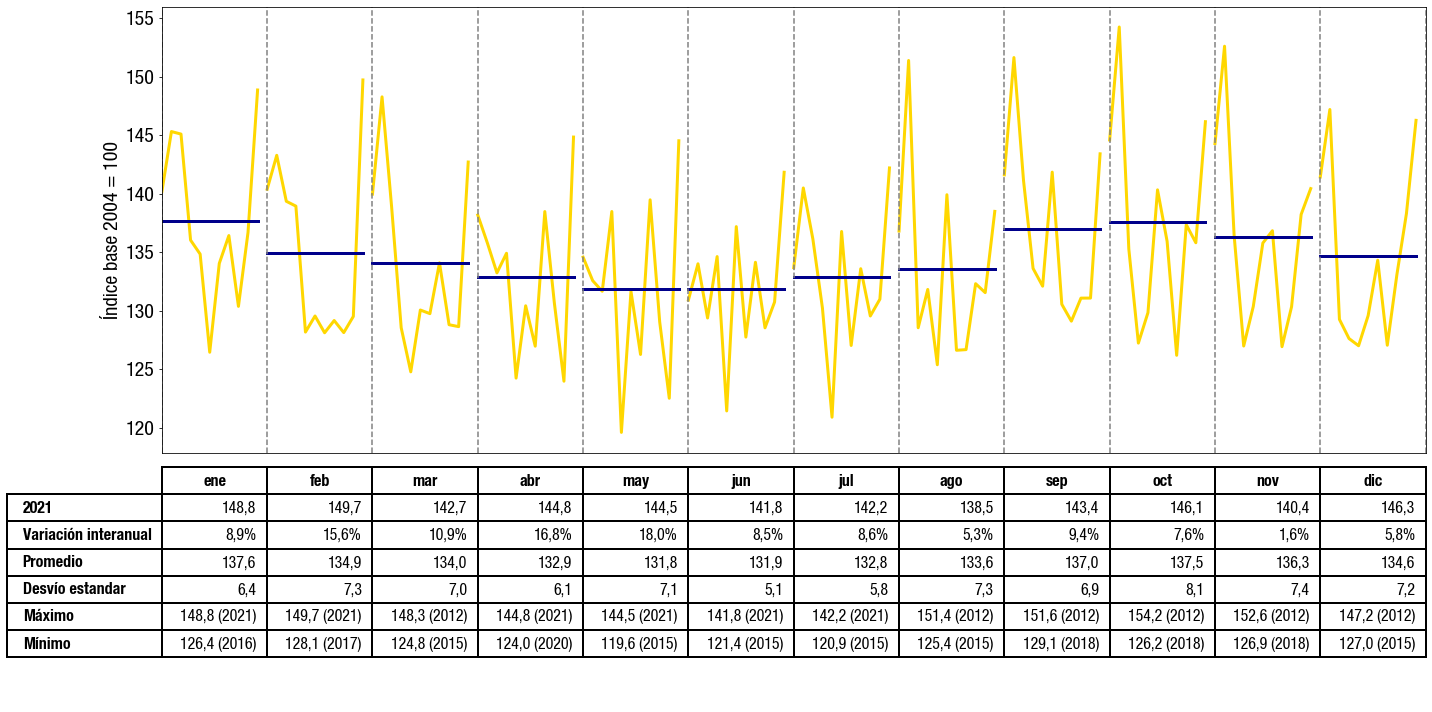

In [9]:
nom_columnas_dato = ['ITI']
ratio_cuadros = 8
ratio_grafo = 15
ratio = [ratio_cuadros]*len(nom_columnas_dato)
ratio.insert(0, ratio_grafo)




fig, ejes = plt.subplots(len(nom_columnas_dato)+1,1, gridspec_kw={'height_ratios': ratio})

if len(nom_columnas_dato)==1:
    fig.set_size_inches(20,10)
else:
    fig.set_size_inches(20,15)

ax_grafico = ejes[0]
ax_tablas = ejes[1:]


columnas_dato = [df[columna].to_list() for columna in nom_columnas_dato]
columnas_media = [df[f'{columna}_media'].to_list() for columna in nom_columnas_dato]
columnas_vari = [df[f'{columna}_var'].to_list() for columna in nom_columnas_dato]

colors = ['gold','darkblue', 'darkred', 'darkblue']*2

for idx1 in range(len(columnas_dato)):
    
    datos_corridos, media_corrida = graf.corrimientoMuestras(columnas_dato[idx1], columnas_media[idx1])

    for idx2 in range(12):
        ax_grafico.plot(datos_corridos[idx2], color = colors[0+idx1*2], linewidth=3)
        ax_grafico.plot(media_corrida[idx2], color = colors[1+idx1*2], linewidth=3)
    for muestras in graf.acumula_muestras(muestras_x_mes):
        ax_grafico.axvline(muestras, color='grey', linestyle='--' )

    ax_grafico.set_xmargin(0)
    ax_grafico.set_xticks([])

    #agrega las tablas
    items_tabla = ['ultiAnio', 'varInter', 'med','desvio','max','min']
    ejes[idx1+1].axis("off")
    tabla = graf.hace_tabla(ejes[idx1+1], columnas_dato[idx1], columnas_vari[idx1], graf.col_width, items_tabla, 1)
    
    #tabla.set(linewidth=2)


    imprime_tabla(tabla, items_tabla, nom_columnas_dato[idx1])

    
    prop, prop_bold = set_fonts(ax_grafico, ax_tablas)

    cells = tabla.properties()["children"]
    for cell in cells:
        cell.set(lw=2)
        cell.set_text_props(fontproperties=prop)
        cell.set_fontsize(16)


    for (row, col), cell in tabla.get_celld().items():
        if (row == 0) or (col == -1):
            cell.set_text_props(fontproperties=prop_bold)
            cell.set_fontsize(16)

plt.subplots_adjust(left=0.1,
        bottom=0.1, 
        right=0.9,  
        top=0.2, 
        wspace=0.4, 
        hspace=0.2)

fig.tight_layout()

##### Para actualizar el nombre del archivo automaticamente segun las columnas
nombre = nom_columnas_dato[0]
if len(nom_columnas_dato)>1:
    for col in nom_columnas_dato[1:]:
        nombre = f'{nombre}-{col}'


fig.savefig(f".\outputs\Estacionalidad {nombre}(01-02-2022).jpg", facecolor='white', transparent=False, dpi=1200, bbox_inches = "tight")

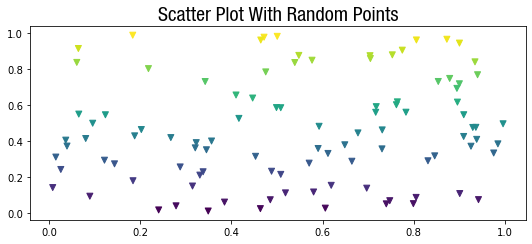

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots()
x = np.random.rand(100)
y = np.random.rand(100)

ax.scatter(x, y, c=y, marker="v")

fprop = fm.FontProperties(fname=r'.\fonts\Helvetica-Neue-LT-Std-57-Condensed_22529.ttf')

ax.set_title('Scatter Plot With Random Points',
            fontproperties=fprop, size=20, fontweight="bold")

plt.savefig("demo.pdf")